In [47]:
import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv("titanic.csv")
df.head()

# number column is the number of people they were travelling with.
# number is a column which hold both numerical and categorical data.
# the point of this program is to handle these kind of mixed variables.

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [49]:
df.shape

(891, 4)

In [50]:
df["number"].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

In [51]:
df["number"].value_counts()

number
A    139
6    131
1    129
2    126
4    126
5    123
3    117
Name: count, dtype: int64

Text(0.5, 1.0, 'passengers travelling with: ')

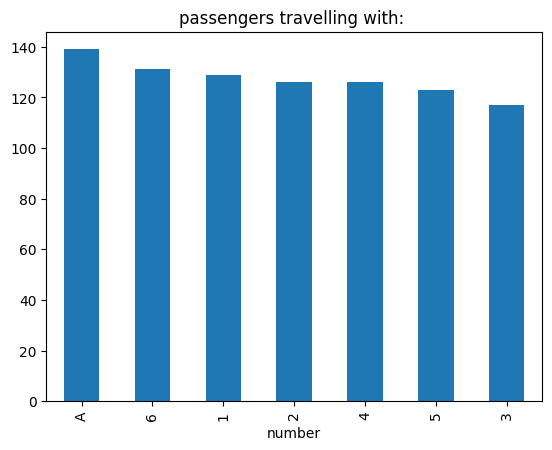

In [52]:
fig = df["number"].value_counts().plot(kind="bar")
fig.set_title("passengers travelling with: ")

In [65]:
# separate numerical data from the number column

df["number_numerical"] = pd.to_numeric(df["number"], errors="coerce")

# errors -> "raise" : raise an error with invalid input
# errors -> "coerse" : return NaN for invalid input
# errors -> "ignore" : ignores the invalid input


In [57]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical
0,NaN,A/5 21171,5,0,5.0
1,C85,PC 17599,3,1,3.0
2,NaN,STON/O2. 3101282,6,1,6.0
3,C123,113803,3,1,3.0
4,NaN,373450,A,0,NaN


In [63]:
# separate categorical data from number column

df["number_categorical"] = np.where(df["number_numerical"].isnull(), df['number'], np.nan)

# np.where(condition, x, y) -> if condition is true, yield x. else yield y.

In [64]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [68]:
# Similarly, if you look at cabin, you'll find a lot of unique categorical data
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [70]:
df["Cabin"].nunique()

147

In [71]:
# now we have to separate categorical and numerical value from cabin

In [72]:
# extract numerical data from Cabin column
df["cabin_numerical"] = df["Cabin"].str.extract('(\d+)')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/xz/1pv049ms51d6d735fvm2v0r40000gn/T/ipykernel_3345/738581303.py:1: SyntaxWarning: invalid escape sequence '\d'
  df["cabin_numerical"] = df["Cabin"].str.extract('(\d+)')


In [74]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_numerical
0,NaN,A/5 21171,5,0,5.0,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123
4,NaN,373450,A,0,NaN,A,NaN


In [75]:
# extract categorical data from cabin column
df["cabin_categorical"] = df["Cabin"].str[0]

In [77]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_numerical,cabin_categorical
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


In [78]:
df["cabin_categorical"].value_counts()

cabin_categorical
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

<Axes: xlabel='cabin_categorical'>

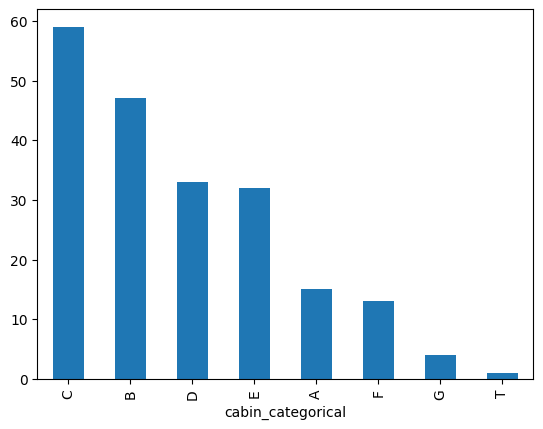

In [79]:
df["cabin_categorical"].value_counts().plot(kind="bar")